### Se pide, usando regresión lineal:

Dibujar con una línea la relación que hay entre la altura y la edad de los alumnos de esta clase: 

- ¿Es una buena técnica para este tipo de problemas? ¿Por qué? 
- ¿Qué error se comete? Calcula los errores que está cometiendo tu modelo uno a uno (lo tienes que calcular tú con python). Aparte, usa el MSE y el RMSE. ¿Alguno es mejor para este problema?
- Representa la matriz de correlación, ¿los datos están correlacionados?

In [1]:
lista_alumnos = [("Caranchoa", 24, 1.82), 
                 ("Leo Messi", 25, 1.71), 
                 ("El bicho", 35, 1.66), 
                 ("Paquirrin", 37, 1.63), 
                 ("John Cobra", 29, 1.90), 
                 ("El tomate", 27, 1.80), 
                 ("El chucky de cieza", 28, 1.70), 
                 ("Chiquito de la Calzada", 32, 1.60), 
                 ("El cuñao", 36, 1.74), 
                 ("Rafa Nadal", 45, 1.72), 
                 ("Pau Gasol", 41, 1.65), 
                 ("El hermano de Pau Gasol", 30, 1.65), 
                 ("Joselito", 40, 1.60), 
                 ("Maria Isabel", 39, 1.80), 
                 ("Melody", 23, 1.77), 
                 ("Las ketchup", 32, 1.75), 
                 ("Pumuki", 27, 1.70), 
                 ("Naranjito", 34, 1.80), 
                 ("Espinete", 27, 1.77), 
                 ("El Feli", 28, 1.70), 
                 ("Jose Luis", 35, 1.80)] 

In [2]:
import pandas as pd

In [4]:
# Crea el siguiente DataFrame
df = pd.DataFrame(lista_alumnos, columns=["nombre", "edad", "estatura"])

In [5]:
# Muestra la info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   nombre    21 non-null     object 
 1   edad      21 non-null     int64  
 2   estatura  21 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 632.0+ bytes


In [6]:
# Muestra los estadísticos del df
df.describe()

,edad,estatura
count,21.000000,21.000000
mean,32.095238,1.727143
std,6.081980,0.079003
min,23.000000,1.600000
25%,27.000000,1.660000
50%,32.000000,1.720000
75%,36.000000,1.800000
max,45.000000,1.900000


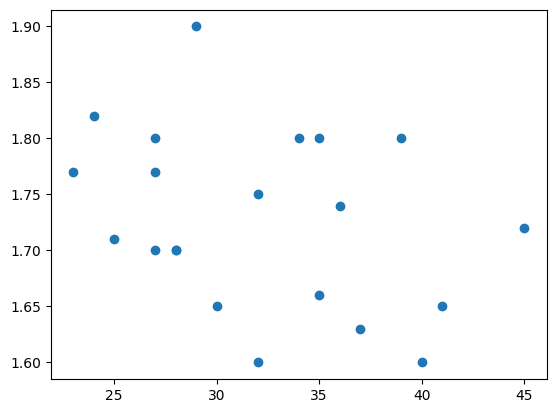

In [7]:
# Genera un scatter plot con Edad y Altura
import matplotlib.pyplot as plt
plt.scatter(df.edad, df.estatura)

<Axes: >

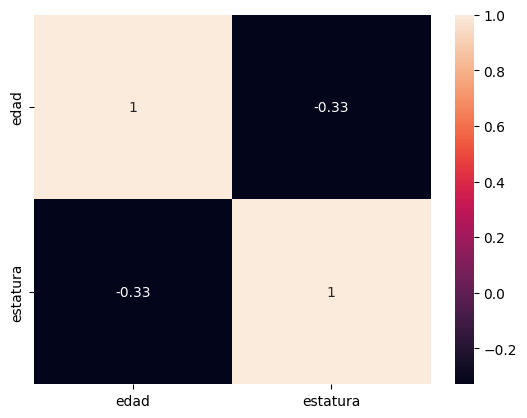

In [8]:
# Genera un heatmap
import seaborn as sns
sns.heatmap(df[["edad", "estatura"]].corr(), annot=True)

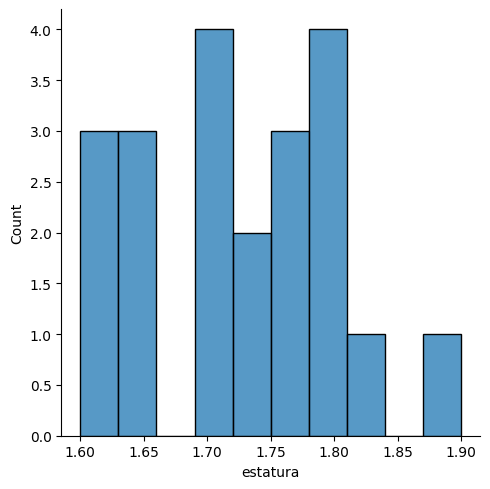

In [11]:
# Genera un distplot
sns.displot(df.estatura, bins=10)

In [12]:
# Divide el df en features (X) y target (y)
X = df[["edad"]]
y = df.estatura

In [13]:
X

,edad
0,24
1,25
2,35
3,37
4,29
5,27
6,28
7,32
8,36
9,45


In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,  y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Divide los datos en conjunto de entrenamiento y test
# Siendo el tamaño del conjunto test un 30% y la semilla sea 42

In [15]:
# Muestra el tamaño de X, X_train, y_train, X_test e y_test

[cosa.shape for cosa in [X_train,X_test,  y_train, y_test]]

[(14, 1), (7, 1), (14,), (7,)]

In [16]:
# Instancia y entrena un regresor lineal
from sklearn.linear_model import LinearRegression
rl = LinearRegression()
rl.fit(X_train, y_train)

LinearRegression()

In [17]:
# imprime el intercepto y el coeficiente
rl.intercept_, rl.coef_

(np.float64(1.8520906282183314), array([-0.00414006]))

(Altura) = 1.85 - 0.0041*(Edad)

In [19]:
# Realiza una predicción con el conjunto de test
predictions = rl.predict(X_test)
predictions

array([1.75272915, 1.71132853, 1.71960865, 1.74858908, 1.7030484 ,
       1.74030896, 1.72788877])

In [21]:
# Crea un df con el conjunto de test
# df_test
df_test = X_test.copy()

In [26]:
# Añade una columna con la predicción
df_test["predict_height"] = predictions
df_test

,edad,predict_height
0,24,1.752729
17,34,1.711329
15,32,1.719609
1,25,1.748589
8,36,1.703048
5,27,1.740309
11,30,1.727889


In [27]:
# Añade una columna con la altura real
df_test["real_height"] = y_test
df_test

,edad,predict_height,real_height
0,24,1.752729,1.82
17,34,1.711329,1.80
15,32,1.719609,1.75
1,25,1.748589,1.71
8,36,1.703048,1.74
5,27,1.740309,1.80
11,30,1.727889,1.65


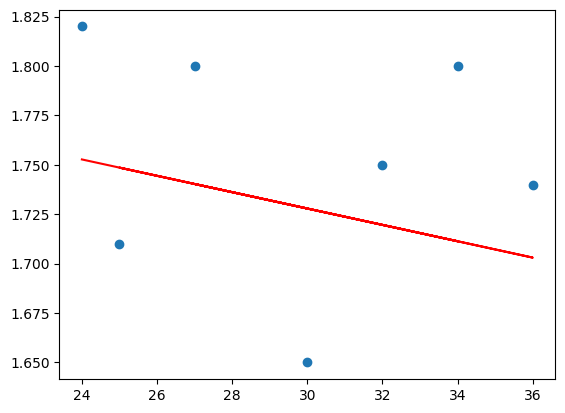

In [32]:
# Crea un plot con los datos reales y la predicción
plt.scatter(x=df_test.edad, y=df_test.real_height)
plt.plot(df_test.edad, df_test.predict_height, "r")

In [33]:
# Muestra el score del módelo
rl.score(X_train, y_train)

0.09871321710383962

In [34]:
rl.score(X_test, y_test)

-0.19742015635643928

In [35]:
df_test

,edad,predict_height,real_height
0,24,1.752729,1.82
17,34,1.711329,1.80
15,32,1.719609,1.75
1,25,1.748589,1.71
8,36,1.703048,1.74
5,27,1.740309,1.80
11,30,1.727889,1.65


In [40]:
import numpy as np
# from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
print("mean_squared_error:", mean_squared_error(df_test.real_height, df_test.predict_height))
print("mean_absolute_error:", mean_absolute_error(df_test.real_height, df_test.predict_height))
print("mean_absolute_percentage_error:", mean_absolute_percentage_error(df_test.real_height, df_test.predict_height))
print("root_mean_absolute_error:", np.sqrt(mean_absolute_error(df_test.real_height, df_test.predict_height)))
print("r2_score:", r2_score(df_test.real_height, df_test.predict_height))



mean_squared_error: 0.0036851216240520687
mean_absolute_error: 0.05706488156539665
mean_absolute_percentage_error: 0.03253724207144201
root_mean_absolute_error: 0.23888256856747972
r2_score: -0.19742015635643928


In [22]:
# Muestra el Mean Absolute Error, el Mean Squared Error y el Root Mean Squared Error

MAE: 0.05706488156539665
MSE: 0.0036851216240520687
RMSE: 0.060705202611078306


In [23]:
# Muestra el Mean Absolute Percentage Error

MAPE: 0.03253724207144201


In [42]:
# Muestra cual sería la predicción para 85 años de edad
rl.predict([[85]])

c:\Users\Ort\miniconda3\envs\data_analysis_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1.50018538])

In [ ]:
# Ahora vamos a calcular el MAE, MSE, RMSE y MAPE a mano

In [44]:
# Añade una columna con el error
df_test["error"] = abs(df_test.real_height-df_test.predict_height)

In [47]:
df_test.error.mean()

np.float64(0.05706488156539665)

In [48]:
# Añade una columna que contenga el error cuadrático
df_test["error_cuadratico"] = df_test.error**2

In [49]:
df_test

,edad,predict_height,real_height,error,error_cuadratico
0,24,1.752729,1.82,0.067271,0.004525
17,34,1.711329,1.80,0.088671,0.007863
15,32,1.719609,1.75,0.030391,0.000924
1,25,1.748589,1.71,0.038589,0.001489
8,36,1.703048,1.74,0.036952,0.001365
5,27,1.740309,1.80,0.059691,0.003563
11,30,1.727889,1.65,0.077889,0.006067


In [50]:
# Muestra el error cuadrático medio
df_test.error_cuadratico.mean()

np.float64(0.0036851216240520687)

In [30]:
# Muestra la raíz del error cuadrático medio

0.060705202611078306

In [31]:
# Muestra el error absoluto medio porcentual

0.032555352156298005